# M2-L1 Problem 3 (5 points)

In this question you will perform regression on 2D data. A linear fit will be demonstrated, and afterward you will extend the code to perform a second-order fit. First, run the Setup cells.

## Setup
### Generating data

In [2]:
# Generating data for the problem
import numpy as np
import matplotlib.pyplot as plt

def gaussian2d(A, mx, my, sx, sy):
    F = lambda xy: A*np.exp(-((xy[:,0]-mx)**2/(2*sx*sx)
                            + (xy[:,1]-my)**2/(2*sy*sy)))
    return F

def get_data_function():
    f1 = gaussian2d(A=0.7, mx = 0.25,my=0.25,sx=0.25,sy=0.25)
    f2 = gaussian2d(A=0.7, mx = 0.75,my=0.75,sx=0.25,sy=0.45)
    f = lambda xy: f1(xy) + f2(xy)
    return f

np.random.seed(0)
x = np.random.rand(60,2)
f = get_data_function()
y = f(x)


### Function for 3D plotting

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Writing a 3D Plotting function. Inputs data points and regression function
def plot_data_with_regression(x_data, y_data, regfun=None):
    plt.figure(figsize=(8,8))
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data[:,0], x_data[:,1],0*y_data,s=13,c=y_data,zorder=-1,cmap="coolwarm", alpha=1, edgecolor="black", linewidth=0.2)
    ax.scatter(x_data[:,0], x_data[:,1],y_data,s=20,c="black",zorder=-1)
    for i in range(len(y_data)):
        ax.plot([x_data[i,0],x_data[i,0]],[x_data[i,1],x_data[i,1]],[0,y_data[i]],'k:',linewidth=0.3)

    ax.set_xlabel('\n' + r"$x_1$")
    ax.set_ylabel('\n' + r"$x_2$")
    ax.set_zlabel('\n'+r"$y$")
    ax.set_zlim(0,0.9)

    if regfun is not None:
        vals = np.linspace(0, 1, 100)
        x1grid, x2grid = np.meshgrid(vals, vals)
        y = regfun(np.concatenate((x1grid.reshape(-1,1),x2grid.reshape(-1,1)),1)).reshape(*np.shape(x1grid))
        ax.plot_surface(x1grid, x2grid, y.reshape(x1grid.shape), alpha = 0.8, cmap = cm.coolwarm)
        plt.show()


### Data visualized

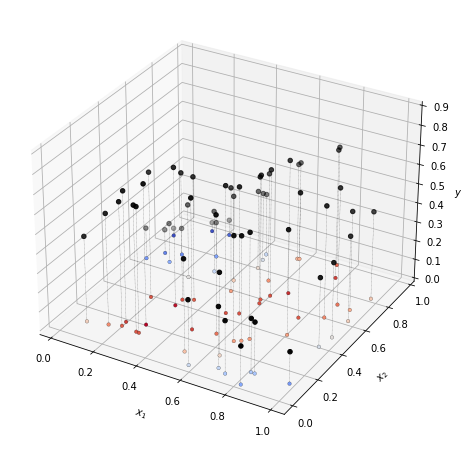

In [4]:
plot_data_with_regression(x,y)

## Demonstration: 2D Linear Regression

First, I generate a design matrix within a function called `get_linear_design_matrix()`

In [5]:
def get_linear_design_matrix(x):
    x1 = x[:,0].reshape(-1, 1)
    x2 = x[:,1].reshape(-1, 1)
    columns = [x1, x2, np.ones_like(x1)]   # Linear design matrix has a column of x1, column of x2, and a column of ones
    X = np.concatenate(columns, axis=1)   # Combine each column horizontally to make a matrix
    return X

In [6]:
X = get_linear_design_matrix(x)
print("First four rows of X:")
print(X[:4,:])

First four rows of X:
[[0.5488135  0.71518937 1.        ]
 [0.60276338 0.54488318 1.        ]
 [0.4236548  0.64589411 1.        ]
 [0.43758721 0.891773   1.        ]]


Next, get the coefficients of the regression:

In [7]:
# Get coefficients 
w1 = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
print("Linear Coefficients:", w1.flatten())

Linear Coefficients: [ 0.11233939 -0.10638434  0.45720916]


Finally, we plot the result. Here, `plot_data_with_regression()` takes as input the x input data, y output data, and a function which performs the desired regression. Therefore I first define said regression function, and plug it in as an argument to the plotting function:

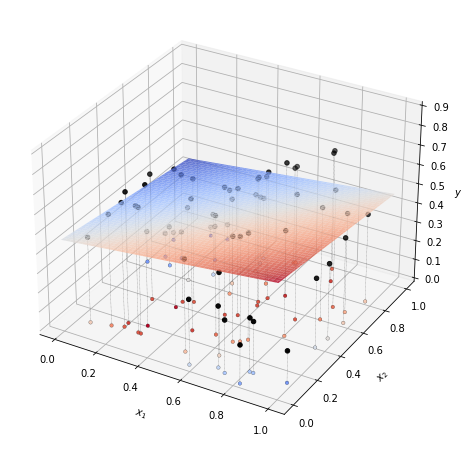

In [8]:
def do_2d_linear_regression(x):
    y_fit = get_linear_design_matrix(x) @ w1
    return y_fit

plot_data_with_regression(x, y, do_2d_linear_regression)

## Your Turn: 2D Quadratic Regression

The linear regression results are clearly not a great fit. You will see if a 2nd order fit can do any better. Fill in the missing code below to generate a quadratic design matrix and plot the results:

In [9]:
def get_quadratic_design_matrix(x):
    x1 = x[:,0].reshape(-1, 1)
    x2 = x[:,1].reshape(-1, 1)

    # YOUR CODE GOES HERE
    # 2ND ORDER, 2-D DESIGN MATRIX NEEDS 6 TOTAL COLUMNS
    columns = np.array([[(x1**2)],[(x2**2)],[(x1*x2)],[x1],[x2],[np.ones_like(x1)]])
    X = np.concatenate(columns, axis=0)  
    return X.T[0]


In [10]:
X = get_quadratic_design_matrix(x)
print("First four rows of X:")
print(X.shape)
print(X[:4,:])

First four rows of X:
(60, 6)
[[0.30119626 0.51149583 0.39250558 0.5488135  0.71518937 1.        ]
 [0.36332369 0.29689768 0.32843563 0.60276338 0.54488318 1.        ]
 [0.17948339 0.41717921 0.27363614 0.4236548  0.64589411 1.        ]
 [0.19148257 0.79525908 0.39022846 0.43758721 0.891773   1.        ]]


In [11]:
# Get coefficients 
w2 = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
print("Quadratic Coefficients:", w2.flatten())

Quadratic Coefficients: [-1.09949493 -0.78655383  1.62592273  0.44193704 -0.17753776  0.55677679]


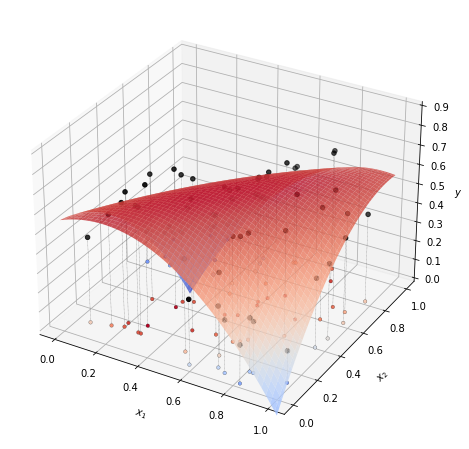

In [12]:
def do_2d_quadratic_regression(x):
    y_fit = get_quadratic_design_matrix(x) @ w2
    return y_fit

plot_data_with_regression(x, y, do_2d_quadratic_regression)